In [1]:
import pandas as pd
import numpy as np

In [2]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [3]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [4]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [5]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'C:/Users/dell/Desktop/ai class/case studies/HAR/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [6]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'C:/Users/dell/Desktop/ai class/case studies/HAR/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [7]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [8]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

C:\Users\dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [10]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [11]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [12]:
# Initializing parameters
#epochs = 30
#batch_size = 16
#n_hidden = 32

In [13]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [14]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [16]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


# 1 Layer Archi with 30 epochs

In [76]:
model = Sequential()
model.add(LSTM(96, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.4))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 96)                40704     
_________________________________________________________________
dropout_11 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 582       
Total params: 41,286
Trainable params: 41,286
Non-trainable params: 0
_________________________________________________________________


In [77]:

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [78]:

history=model.fit(X_train,Y_train,epochs=30,batch_size=10,validation_data=(X_test, Y_test))          

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 145s 20ms/step - loss: 1.1736 - acc: 0.4834 - val_loss: 0.9885 - val_acc: 0.5911
Epoch 2/30
7352/7352 [==============================] - 145s 20ms/step - loss: 0.7751 - acc: 0.6571 - val_loss: 0.8801 - val_acc: 0.6098
Epoch 3/30
7352/7352 [==============================] - 141s 19ms/step - loss: 0.5634 - acc: 0.7816 - val_loss: 0.5042 - val_acc: 0.8263
Epoch 4/30
7352/7352 [==============================] - 147s 20ms/step - loss: 0.3672 - acc: 0.8780 - val_loss: 0.5458 - val_acc: 0.8164
Epoch 5/30
7352/7352 [==============================] - 150s 20ms/step - loss: 0.2414 - acc: 0.9131 - val_loss: 0.3666 - val_acc: 0.8904
Epoch 6/30
7352/7352 [==============================] - 151s 21ms/step - loss: 0.2248 - acc: 0.9218 - val_loss: 0.4201 - val_acc: 0.8989
Epoch 7/30
7352/7352 [==============================] - 171s 23ms/step - loss: 0.2000 - acc: 0.9293 - val_loss: 0.3349 - val_acc: 

Test loss: 0.33243675980633264
Test accuracy: 0.9185612487275195


<IPython.core.display.Javascript object>


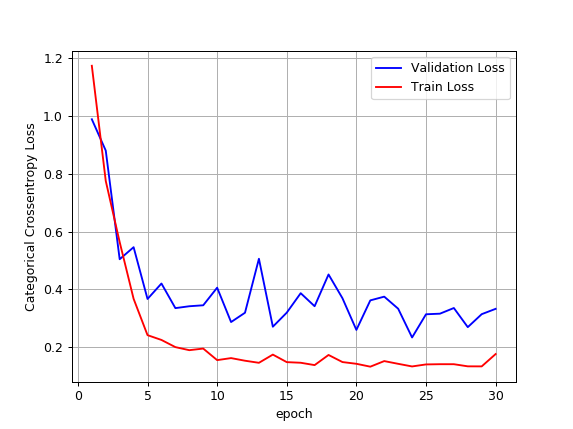

In [79]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 30

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [80]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  1      421        68        0                   0   
STANDING                 0      121       409        1                   0   
WALKING                  0        0         0      488                   7   
WALKING_DOWNSTAIRS       0        0         0       10                 409   
WALKING_UPSTAIRS         0        2         0       26                   0   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           1  
WALKING                            1  
WALKING_DOWNSTAIRS                 1  
WALKING_UPSTAIRS                 443  


In [81]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 6s 2ms/step


In [82]:
score

[0.33243675980633264, 0.9185612487275195]

# 1 Layer Archi with 50 epochs

In [83]:
model = Sequential()
model.add(LSTM(96, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.4))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 96)                40704     
_________________________________________________________________
dropout_12 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 582       
Total params: 41,286
Trainable params: 41,286
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [85]:
# Training the model
history=model.fit(X_train,Y_train,epochs=50,batch_size=10,validation_data=(X_test, Y_test))
          
          
          
          

Train on 7352 samples, validate on 2947 samples
Epoch 1/50
7352/7352 [==============================] - 184s 25ms/step - loss: 1.1563 - acc: 0.5106 - val_loss: 0.8616 - val_acc: 0.6417
Epoch 2/50
7352/7352 [==============================] - 181s 25ms/step - loss: 0.8104 - acc: 0.6597 - val_loss: 0.6888 - val_acc: 0.6888
Epoch 3/50
7352/7352 [==============================] - 182s 25ms/step - loss: 0.4461 - acc: 0.8508 - val_loss: 0.3240 - val_acc: 0.8894
Epoch 4/50
7352/7352 [==============================] - 177s 24ms/step - loss: 0.3349 - acc: 0.8961 - val_loss: 0.3218 - val_acc: 0.8887
Epoch 5/50
7352/7352 [==============================] - 170s 23ms/step - loss: 0.2491 - acc: 0.9143 - val_loss: 0.4865 - val_acc: 0.8575
Epoch 6/50
7352/7352 [==============================] - 128s 17ms/step - loss: 0.2064 - acc: 0.9316 - val_loss: 0.3195 - val_acc: 0.8975
Epoch 7/50
7352/7352 [==============================] - 128s 17ms/step - loss: 0.1833 - acc: 0.9365 - val_loss: 0.3284 - val_acc: 

Test loss: 0.5680553933917047
Test accuracy: 0.8985408890397014


<IPython.core.display.Javascript object>


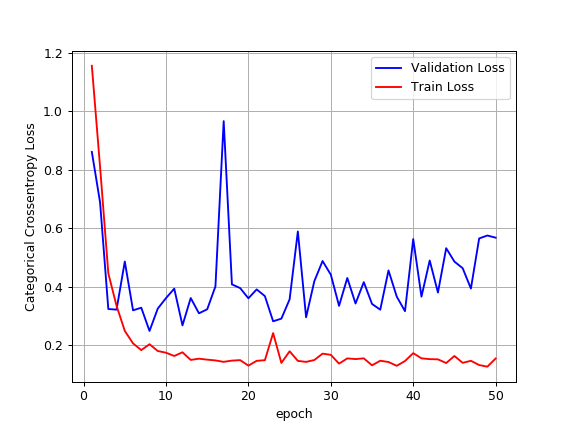

In [86]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 50

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [87]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0        27        0                   0   
SITTING                  0      382       108        0                   0   
STANDING                 0      100       431        1                   0   
WALKING                  0        0         2      470                   7   
WALKING_DOWNSTAIRS       0        1         0        2                 417   
WALKING_UPSTAIRS         0        1         1       27                   4   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           0  
WALKING                           17  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 438  


In [88]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 5s 2ms/step


In [89]:
score

[0.5680553933917047, 0.8985408890397014]

# 1 Layer Archi with 75 epochs

In [90]:
model = Sequential()
model.add(LSTM(96, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.4))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 96)                40704     
_________________________________________________________________
dropout_13 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 582       
Total params: 41,286
Trainable params: 41,286
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [92]:
history=model.fit(X_train,Y_train,epochs=75,batch_size=10,validation_data=(X_test, Y_test))          

Train on 7352 samples, validate on 2947 samples
Epoch 1/75
7352/7352 [==============================] - 139s 19ms/step - loss: 1.2161 - acc: 0.4702 - val_loss: 1.1158 - val_acc: 0.5273
Epoch 2/75
7352/7352 [==============================] - 134s 18ms/step - loss: 0.9342 - acc: 0.5978 - val_loss: 0.9347 - val_acc: 0.5952
Epoch 3/75
7352/7352 [==============================] - 134s 18ms/step - loss: 0.6823 - acc: 0.7246 - val_loss: 0.7914 - val_acc: 0.6576
Epoch 4/75
7352/7352 [==============================] - 135s 18ms/step - loss: 0.4226 - acc: 0.8458 - val_loss: 0.5643 - val_acc: 0.7879
Epoch 5/75
7352/7352 [==============================] - 134s 18ms/step - loss: 0.2943 - acc: 0.9034 - val_loss: 0.4454 - val_acc: 0.8643
Epoch 6/75
7352/7352 [==============================] - 135s 18ms/step - loss: 0.2073 - acc: 0.9301 - val_loss: 0.3066 - val_acc: 0.8836
Epoch 7/75
7352/7352 [==============================] - 134s 18ms/step - loss: 0.2038 - acc: 0.9278 - val_loss: 0.2721 - val_acc: 

Test loss: 0.3871453508046493
Test accuracy: 0.9117746861214795


<IPython.core.display.Javascript object>


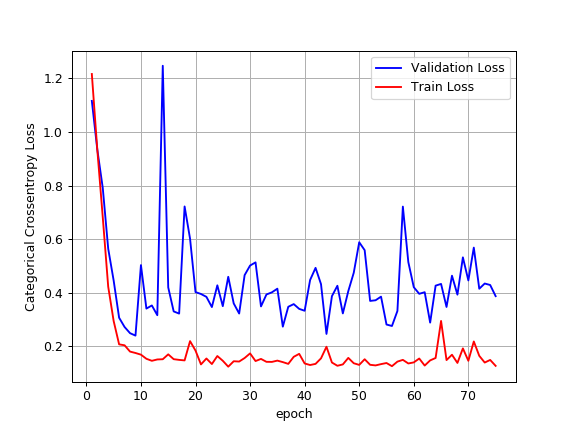

In [93]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 75

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [94]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 505        0        17        0                   0   
SITTING                  2      359       128        0                   0   
STANDING                 0       79       452        1                   0   
WALKING                  0        0         0      485                   7   
WALKING_DOWNSTAIRS       0        0         0        1                 419   
WALKING_UPSTAIRS         0        3         0        0                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            15  
SITTING                            2  
STANDING                           0  
WALKING                            4  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 467  


In [95]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 3s 1ms/step


In [96]:
score

[0.3871453508046493, 0.9117746861214795]

# 1 Layer Archi with 100 epochs 

In [128]:
model = Sequential()
model.add(LSTM(96, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.4))
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 96)                40704     
_________________________________________________________________
dropout_22 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 582       
Total params: 41,286
Trainable params: 41,286
Non-trainable params: 0
_________________________________________________________________


In [129]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [130]:
history=model.fit(X_train,Y_train,epochs=100,batch_size=10,validation_data=(X_test, Y_test))          

Train on 7352 samples, validate on 2947 samples
Epoch 1/100
7352/7352 [==============================] - 84s 11ms/step - loss: 1.1760 - acc: 0.4816 - val_loss: 0.9813 - val_acc: 0.5877
Epoch 2/100
7352/7352 [==============================] - 80s 11ms/step - loss: 0.8030 - acc: 0.6508 - val_loss: 0.8771 - val_acc: 0.6624
Epoch 3/100
7352/7352 [==============================] - 81s 11ms/step - loss: 0.6876 - acc: 0.7116 - val_loss: 0.5843 - val_acc: 0.7526
Epoch 4/100
7352/7352 [==============================] - 82s 11ms/step - loss: 0.4915 - acc: 0.8205 - val_loss: 0.4450 - val_acc: 0.8487
Epoch 5/100
7352/7352 [==============================] - 81s 11ms/step - loss: 0.3019 - acc: 0.9022 - val_loss: 0.5157 - val_acc: 0.8436
Epoch 6/100
7352/7352 [==============================] - 82s 11ms/step - loss: 0.2276 - acc: 0.9256 - val_loss: 0.3086 - val_acc: 0.8958
Epoch 7/100
7352/7352 [==============================] - 81s 11ms/step - loss: 0.2221 - acc: 0.9285 - val_loss: 0.4807 - val_acc: 

Test loss: 0.699745632319076
Test accuracy: 0.9009161859518154


<IPython.core.display.Javascript object>


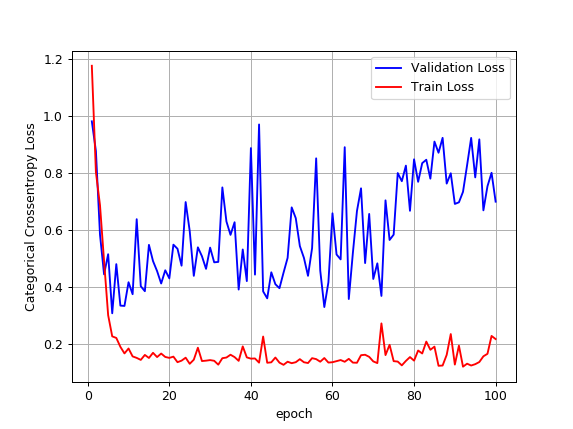

In [131]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 100

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [132]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0        27        0                   0   
SITTING                  0      421        68        1                   0   
STANDING                 0      106       425        1                   0   
WALKING                  0        1         0      445                  41   
WALKING_DOWNSTAIRS       0        0         0        1                 417   
WALKING_UPSTAIRS         0        8         0        1                  25   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           0  
WALKING                            9  
WALKING_DOWNSTAIRS                 2  
WALKING_UPSTAIRS                 437  


In [133]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 3s 1ms/step


In [134]:
score

[0.699745632319076, 0.9009161859518154]

# 2 Layer Archi with 30 epochs

In [98]:
model_1 = Sequential()
model_1.add(LSTM(96, input_shape=(timesteps, input_dim),return_sequences=True))
model_1.add(Dropout(0.4))
model_1.add(LSTM(96, input_shape=(timesteps, input_dim)))
model_1.add(Dropout(0.4))
model_1.add(Dense(n_classes, activation='sigmoid'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 128, 96)           40704     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128, 96)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 96)                74112     
_________________________________________________________________
dropout_15 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 582       
Total params: 115,398
Trainable params: 115,398
Non-trainable params: 0
_________________________________________________________________


In [99]:
model_1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [100]:
history=model_1.fit(X_train,Y_train,batch_size=10,epochs=30,validation_data=(X_test, Y_test))

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 218s 30ms/step - loss: 0.9793 - acc: 0.5462 - val_loss: 0.8546 - val_acc: 0.5959
Epoch 2/30
7352/7352 [==============================] - 218s 30ms/step - loss: 0.7594 - acc: 0.6526 - val_loss: 0.9207 - val_acc: 0.6654
Epoch 3/30
7352/7352 [==============================] - 217s 30ms/step - loss: 0.6989 - acc: 0.6904 - val_loss: 0.7915 - val_acc: 0.6770
Epoch 4/30
7352/7352 [==============================] - 237s 32ms/step - loss: 0.5215 - acc: 0.7952 - val_loss: 0.7342 - val_acc: 0.7153
Epoch 5/30
7352/7352 [==============================] - 212s 29ms/step - loss: 0.2752 - acc: 0.9052 - val_loss: 0.4272 - val_acc: 0.8582
Epoch 6/30
7352/7352 [==============================] - 214s 29ms/step - loss: 0.2082 - acc: 0.9280 - val_loss: 0.4028 - val_acc: 0.8795
Epoch 7/30
7352/7352 [==============================] - 194s 26ms/step - loss: 0.1851 - acc: 0.9355 - val_loss: 0.4243 - val_acc: 

Test loss: 0.6013602363030038
Test accuracy: 0.9083814048184594


<IPython.core.display.Javascript object>


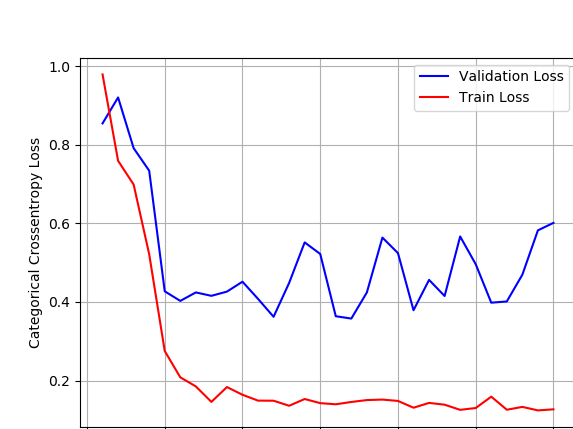

In [101]:
score = model_1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 30

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [102]:
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 505        0        17        0                   0   
SITTING                  2      359       128        0                   0   
STANDING                 0       79       452        1                   0   
WALKING                  0        0         0      485                   7   
WALKING_DOWNSTAIRS       0        0         0        1                 419   
WALKING_UPSTAIRS         0        3         0        0                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            15  
SITTING                            2  
STANDING                           0  
WALKING                            4  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 467  


In [103]:
score = model_1.evaluate(X_test, Y_test)

2947/2947 [==============================] - 10s 3ms/step


In [104]:
score

[0.6013602363030038, 0.9083814048184594]

# 2 Layer Archi with 50 epochs

In [105]:
model_1 = Sequential()
model_1.add(LSTM(96, input_shape=(timesteps, input_dim),return_sequences=True))
model_1.add(Dropout(0.4))
model_1.add(LSTM(96, input_shape=(timesteps, input_dim)))
model_1.add(Dropout(0.4))
model_1.add(Dense(n_classes, activation='sigmoid'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 128, 96)           40704     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128, 96)           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 96)                74112     
_________________________________________________________________
dropout_17 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 582       
Total params: 115,398
Trainable params: 115,398
Non-trainable params: 0
_________________________________________________________________


In [106]:
model_1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [109]:
history=model_1.fit(X_train,Y_train,batch_size=10,epochs=50,validation_data=(X_test, Y_test))

Train on 7352 samples, validate on 2947 samples
Epoch 1/50
7352/7352 [==============================] - 199s 27ms/step - loss: 0.1548 - acc: 0.9421 - val_loss: 0.4041 - val_acc: 0.9057
Epoch 2/50
7352/7352 [==============================] - 198s 27ms/step - loss: 0.1694 - acc: 0.9393 - val_loss: 0.2897 - val_acc: 0.9155
Epoch 3/50
7352/7352 [==============================] - 218s 30ms/step - loss: 0.1470 - acc: 0.9448 - val_loss: 0.3266 - val_acc: 0.9148
Epoch 4/50
7352/7352 [==============================] - 196s 27ms/step - loss: 0.1464 - acc: 0.9471 - val_loss: 0.4815 - val_acc: 0.9063
Epoch 5/50
7352/7352 [==============================] - 195s 27ms/step - loss: 0.1435 - acc: 0.9470 - val_loss: 0.4698 - val_acc: 0.9016
Epoch 6/50
7352/7352 [==============================] - 195s 27ms/step - loss: 0.2609 - acc: 0.8788 - val_loss: 0.3532 - val_acc: 0.9118
Epoch 7/50
7352/7352 [==============================] - 195s 26ms/step - loss: 0.1617 - acc: 0.9402 - val_loss: 0.4329 - val_acc: 

Test loss: 0.5947409926520166
Test accuracy: 0.9100780454699695


<IPython.core.display.Javascript object>


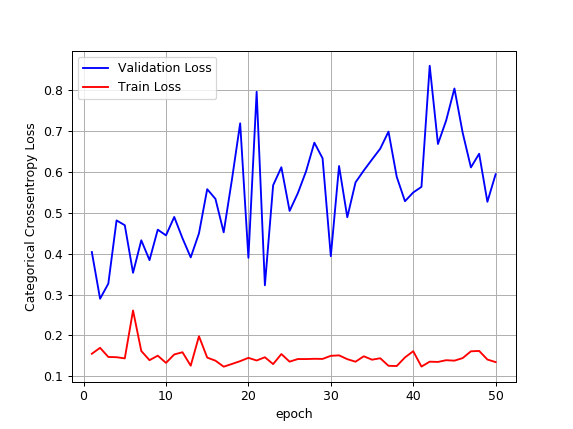

In [110]:
score = model_1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 50

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [111]:
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 505        0        17        0                   0   
SITTING                  2      359       128        0                   0   
STANDING                 0       79       452        1                   0   
WALKING                  0        0         0      485                   7   
WALKING_DOWNSTAIRS       0        0         0        1                 419   
WALKING_UPSTAIRS         0        3         0        0                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            15  
SITTING                            2  
STANDING                           0  
WALKING                            4  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 467  


In [112]:
score = model_1.evaluate(X_test, Y_test)

2947/2947 [==============================] - 9s 3ms/step


In [113]:
score

[0.5947409926520166, 0.9100780454699695]

# 2 Layer Archi with 75 epochs

In [114]:
model_1 = Sequential()
model_1.add(LSTM(96, input_shape=(timesteps, input_dim),return_sequences=True))
model_1.add(Dropout(0.4))
model_1.add(LSTM(96, input_shape=(timesteps, input_dim)))
model_1.add(Dropout(0.4))
model_1.add(Dense(n_classes, activation='sigmoid'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 128, 96)           40704     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128, 96)           0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 96)                74112     
_________________________________________________________________
dropout_19 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 582       
Total params: 115,398
Trainable params: 115,398
Non-trainable params: 0
_________________________________________________________________


In [115]:
model_1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [116]:
history=model_1.fit(X_train,Y_train,batch_size=10,epochs=75,validation_data=(X_test, Y_test))

Train on 7352 samples, validate on 2947 samples
Epoch 1/75
7352/7352 [==============================] - 202s 28ms/step - loss: 1.0302 - acc: 0.5411 - val_loss: 0.8793 - val_acc: 0.6233
Epoch 2/75
7352/7352 [==============================] - 198s 27ms/step - loss: 0.7260 - acc: 0.6568 - val_loss: 0.7738 - val_acc: 0.5986
Epoch 3/75
7352/7352 [==============================] - 199s 27ms/step - loss: 0.5447 - acc: 0.7648 - val_loss: 0.8629 - val_acc: 0.6956
Epoch 4/75
7352/7352 [==============================] - 198s 27ms/step - loss: 0.2954 - acc: 0.8919 - val_loss: 0.3614 - val_acc: 0.8918
Epoch 5/75
7352/7352 [==============================] - 198s 27ms/step - loss: 0.2340 - acc: 0.9217 - val_loss: 0.6153 - val_acc: 0.8334
Epoch 6/75
7352/7352 [==============================] - 198s 27ms/step - loss: 0.1923 - acc: 0.9272 - val_loss: 0.5013 - val_acc: 0.8789
Epoch 7/75
7352/7352 [==============================] - 198s 27ms/step - loss: 0.1750 - acc: 0.9384 - val_loss: 0.2604 - val_acc: 

7352/7352 [==============================] - 198s 27ms/step - loss: 0.1521 - acc: 0.9543 - val_loss: 0.4905 - val_acc: 0.9172
Epoch 61/75
7352/7352 [==============================] - 198s 27ms/step - loss: 0.1673 - acc: 0.9529 - val_loss: 0.6036 - val_acc: 0.8901
Epoch 62/75
7352/7352 [==============================] - 199s 27ms/step - loss: 0.1962 - acc: 0.9377 - val_loss: 0.7949 - val_acc: 0.8673
Epoch 63/75
7352/7352 [==============================] - 199s 27ms/step - loss: 0.2091 - acc: 0.9348 - val_loss: 0.5945 - val_acc: 0.9131
Epoch 64/75
7352/7352 [==============================] - 199s 27ms/step - loss: 0.1369 - acc: 0.9576 - val_loss: 0.3987 - val_acc: 0.9253
Epoch 65/75
7352/7352 [==============================] - 199s 27ms/step - loss: 0.1178 - acc: 0.9607 - val_loss: 0.5765 - val_acc: 0.9240
Epoch 66/75
7352/7352 [==============================] - 199s 27ms/step - loss: 0.1301 - acc: 0.9561 - val_loss: 0.4358 - val_acc: 0.9240
Epoch 67/75
7352/7352 [=======================

Test loss: 0.40827059678320565
Test accuracy: 0.9368849677638276


<IPython.core.display.Javascript object>


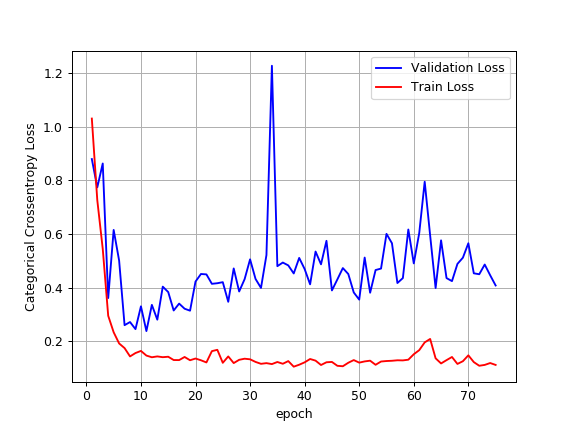

In [117]:
score = model_1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 75

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [118]:
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 505        0        17        0                   0   
SITTING                  2      359       128        0                   0   
STANDING                 0       79       452        1                   0   
WALKING                  0        0         0      485                   7   
WALKING_DOWNSTAIRS       0        0         0        1                 419   
WALKING_UPSTAIRS         0        3         0        0                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            15  
SITTING                            2  
STANDING                           0  
WALKING                            4  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 467  


In [119]:
score = model_1.evaluate(X_test, Y_test)

2947/2947 [==============================] - 9s 3ms/step


In [120]:
score

[0.40827059678320565, 0.9368849677638276]

# 2 Layer Archi with 100 epochs

In [121]:
model_1 = Sequential()
model_1.add(LSTM(96, input_shape=(timesteps, input_dim),return_sequences=True))
model_1.add(Dropout(0.4))
model_1.add(LSTM(96, input_shape=(timesteps, input_dim)))
model_1.add(Dropout(0.4))
model_1.add(Dense(n_classes, activation='sigmoid'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 128, 96)           40704     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128, 96)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 96)                74112     
_________________________________________________________________
dropout_21 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 582       
Total params: 115,398
Trainable params: 115,398
Non-trainable params: 0
_________________________________________________________________


In [122]:
model_1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [123]:
history=model_1.fit(X_train,Y_train,batch_size=10,epochs=100,validation_data=(X_test, Y_test))

Train on 7352 samples, validate on 2947 samples
Epoch 1/100
7352/7352 [==============================] - 203s 28ms/step - loss: 0.9500 - acc: 0.5687 - val_loss: 0.8684 - val_acc: 0.5911
Epoch 2/100
7352/7352 [==============================] - 199s 27ms/step - loss: 0.7465 - acc: 0.6662 - val_loss: 0.8427 - val_acc: 0.6396
Epoch 3/100
7352/7352 [==============================] - 199s 27ms/step - loss: 0.6355 - acc: 0.7255 - val_loss: 0.8029 - val_acc: 0.7000
Epoch 4/100
7352/7352 [==============================] - 199s 27ms/step - loss: 0.3577 - acc: 0.8785 - val_loss: 0.5039 - val_acc: 0.8412
Epoch 5/100
7352/7352 [==============================] - 200s 27ms/step - loss: 0.2397 - acc: 0.9170 - val_loss: 0.3195 - val_acc: 0.9016
Epoch 6/100
7352/7352 [==============================] - 199s 27ms/step - loss: 0.1952 - acc: 0.9323 - val_loss: 0.2891 - val_acc: 0.9186
Epoch 7/100
7352/7352 [==============================] - 199s 27ms/step - loss: 0.1567 - acc: 0.9426 - val_loss: 0.2749 - va

Test loss: 0.7692773427470666
Test accuracy: 0.9121140142517815


<IPython.core.display.Javascript object>


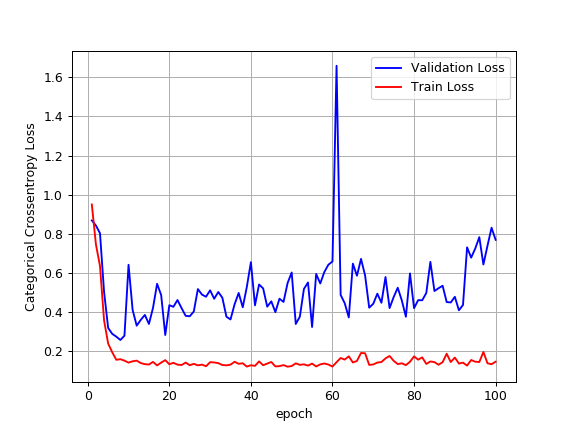

In [124]:
score = model_1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
epochs = 100

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [125]:
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 505        0        17        0                   0   
SITTING                  2      359       128        0                   0   
STANDING                 0       79       452        1                   0   
WALKING                  0        0         0      485                   7   
WALKING_DOWNSTAIRS       0        0         0        1                 419   
WALKING_UPSTAIRS         0        3         0        0                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            15  
SITTING                            2  
STANDING                           0  
WALKING                            4  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 467  


In [126]:
score = model_1.evaluate(X_test, Y_test)

2947/2947 [==============================] - 9s 3ms/step


In [127]:
score

[0.7692773427470666, 0.9121140142517815]

# Observations:

<table>
    <tr>
        <th>Model</th>
        <th>Accuracy</th>
        <th>Loss</th>
        <th>Epochs</th>
    </tr>
    <tr>
        <td>96-0.4</td>
        <td>91%</td>
        <td>0.33</td>
        <td>30</td>
    </tr>
    <tr>
        <td>96-0.4</td>
        <td>89%</td>
        <td>0.58</td>
        <td>50</td>
    </tr>
    <tr>
        <td>96-0.4</td>
        <td>91%</td>
        <td>0.38</td>
        <td>75</td>
    </tr>
    <tr>
        <td>96-0.4</td>
        <td>90%</td>
        <td>0.69</td>
        <td>100</td>
    </tr>
    <tr>
        <td>96-0.4-94-0.4</td>
        <td>90%</td>
        <td>0.60</td>
        <td>30</td>
    </tr>
    <tr>
        <td>96-0.4-94-0.4</td>
        <td>91%</td>
        <td>0.59</td>
        <td>50</td>
    </tr>
    <tr>
        <td>96-0.4-96-0.4</td>
        <td>93%</td>
        <td>0.48</td>
        <td>75</td>
    </tr>
    <tr>
        <td>96-0.4-96-0.4</td>
        <td>91%</td>
        <td>0.76</td>
        <td>100</td>
    </tr>
    
</table>


# Steps:

1. Obtain the data set and load the divide it into test and train.

2. Then with the help of Keras wrapper class we used gridsearchcv to find the best hyper parameters.

3. Form that we have got the best results for 96 with 0.4 dropout.

4. Then we have designed LSTM with 1 & 2 layers, But with different epochs like 30,50,75,100.

5. Then we got the above results.

# Conclusions:


1. From the above observation we can see that for 1 layer archi we have acheived 91% accuracy.

2. As the number of epochs increases we can see that loss is increasing.

3. If we want to choose 1 layer archi we can choose 75 epochs which has minimum loss.

4. In case of 2 layer archi we can see that we are having 93% accuracy for 75 epochs.

5. Here also we can see that all the models are having more that 90% accuray.